# Regridding the WOA13 onto the ASTE grid

In [1]:
import xarray as xr
import xmitgcm
import MITgcm_recipes
import tqdm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Get the datasets

### WOA13 climatology

In [2]:
woa_dir = '/local/data/artemis/workspace/rdussin/Observations/WOA13/originals/'
woa_no3_ds = xr.open_mfdataset(woa_dir + 'woa13_all_n*.nc', decode_times=False)
woa_po4_ds = xr.open_mfdataset(woa_dir + 'woa13_all_p*.nc', decode_times=False)
woa_o2_ds = xr.open_mfdataset(woa_dir + 'woa13_all_o*.nc', decode_times=False)

woa_ts_ds = xr.open_mfdataset(woa_dir + 'woa13_decav*.nc', decode_times=False)

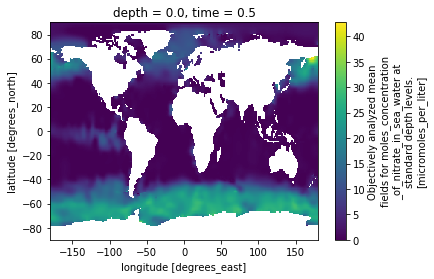

In [3]:
woa_no3_ds['n_an'].isel(time=0, depth=0).plot()

### ASTE raw grid

In [4]:
file_aste_raw = '/local/data/artemis/workspace/rdussin/ASTE/GRID/nc/aste_grid.nc'
aste_raw = xr.open_dataset(file_aste_raw)

### ASTE output grid

In [5]:
datadir_aste = '/local/data/artemis/workspace/rdussin/ASTE/RUNS/ASTE-Phy-Release1/outputs/'
md = xmitgcm.utils.get_extra_metadata(domain='aste', nx=270)
aste_out = xmitgcm.open_mdsdataset(datadir_aste, iters=[], prefix=['T','S','Eta','U','V'],
                                   geometry='llc', nx=270, extra_metadata=md)

## Vertical interpolation

In [6]:
# nitrate
woa_no3_dsz = MITgcm_recipes.vertical_interpolation(woa_no3_ds, aste_out['Z'], ['n_an'],
                                                    lonvar='lon', latvar='lat',
                                                    depth_varin='depth',
                                                    timevar='time')

# phosphate
woa_po4_dsz = MITgcm_recipes.vertical_interpolation(woa_po4_ds, aste_out['Z'], ['p_an'],
                                                    lonvar='lon', latvar='lat',
                                                    depth_varin='depth',
                                                    timevar='time')

# oxygen
woa_o2_dsz = MITgcm_recipes.vertical_interpolation(woa_o2_ds, aste_out['Z'], ['o_an'],
                                                   lonvar='lon', latvar='lat',
                                                   depth_varin='depth',
                                                   timevar='time')

# T/S
woa_ts_dsz = MITgcm_recipes.vertical_interpolation(woa_ts_ds, aste_out['Z'], ['t_an', 's_an'],
                                                   lonvar='lon', latvar='lat',
                                                   depth_varin='depth',
                                                   timevar='time')

In [7]:
woa_no3_dsz

<xarray.Dataset>
Dimensions:  (k: 50, lat: 180, lon: 360, time: 12)
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
  * time     (time) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
    drF      (k) >f4 dask.array<shape=(50,), chunksize=(50,)>
    PHrefC   (k) >f4 dask.array<shape=(50,), chunksize=(50,)>
Data variables:
    Z        (k) >f4 dask.array<shape=(50,), chunksize=(50,)>
    n_an     (time, k, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...

## Regridding

The mld fields are not gonna be used to force the model so no extrapolation is needed.
Those are 2d fields so no vertical interpolation either

In [8]:
woa_no3_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(woa_no3_dsz, aste_raw, ['n_an'], 
                                                             method='bilinear',
                                                             lonname='lon', latname='lat', point='T', 
                                                             periodic=True, reuse_weights=False,
                                                             regridname='woa03_1deg_aste_face')

woa_po4_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(woa_po4_dsz, aste_raw, ['p_an'], 
                                                             method='bilinear',
                                                             lonname='lon', latname='lat', point='T', 
                                                             periodic=True, reuse_weights=True,
                                                             regridname='woa03_1deg_aste_face')

woa_o2_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(woa_o2_dsz, aste_raw, ['o_an'], 
                                                            method='bilinear',
                                                            lonname='lon', latname='lat', point='T', 
                                                            periodic=True, reuse_weights=True,
                                                            regridname='woa03_1deg_aste_face')

woa_ts_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(woa_ts_dsz, aste_raw, ['t_an', 's_an'], 
                                                            method='bilinear',
                                                            lonname='lon', latname='lat', point='T', 
                                                            periodic=True, reuse_weights=True,
                                                            regridname='woa03_1deg_aste_face')

Overwrite existing file: woa03_1deg_aste_face0.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: woa03_1deg_aste_face1.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: woa03_1deg_aste_face2.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: woa03_1deg_aste_face3.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: woa03_1deg_aste_face4.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: woa03_1deg_aste_face5.nc 
 You can set reuse_weights=True to save computing time.
Reuse existing file: woa03_1deg_aste_face0.nc
Reuse existing file: woa03_1deg_aste_face1.nc
Reuse existing file: woa03_1deg_aste_face2.nc
Reuse existing file: woa03_1deg_aste_face3.nc
Reuse existing file: woa03_1deg_aste_face4.nc
Reuse existing file: woa03_1deg_aste_face5.nc
Reuse existing file: woa03_1deg_aste_face0.nc
Reuse existing file: woa03_1deg_aste

## Checking the results

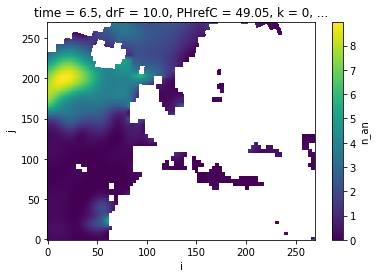

In [9]:
woa_no3_aste['n_an'].isel(face=1, time=6, k=0).plot()

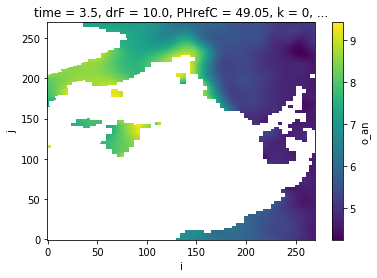

In [10]:
woa_o2_aste['o_an'].isel(face=4, time=3, k=0).plot()

## Write to netcdf file

In [11]:
woa_no3_aste['time'] = xr.DataArray(np.arange(12), dims=['time'], attrs={'units':'months since 1900-01-15 0:00:00'})
woa_po4_aste['time'] = xr.DataArray(np.arange(12), dims=['time'], attrs={'units':'months since 1900-01-15 0:00:00'})
woa_o2_aste['time'] = xr.DataArray(np.arange(12), dims=['time'], attrs={'units':'months since 1900-01-15 0:00:00'})

woa_ts_aste['time'] = xr.DataArray(np.arange(12), dims=['time'], attrs={'units':'months since 1900-01-15 0:00:00'})

In [12]:
woa_no3_aste = woa_no3_aste.transpose(*('time','face','k','j','i'))
woa_po4_aste = woa_po4_aste.transpose(*('time','face','k','j','i'))
woa_o2_aste = woa_o2_aste.transpose(*('time','face','k','j','i'))

woa_ts_aste = woa_ts_aste.transpose(*('time','face','k','j','i'))

In [13]:
woa_no3_aste

<xarray.Dataset>
Dimensions:  (face: 6, i: 270, j: 270, k: 50, time: 12)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11
    drF      (k) >f4 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.01 10.03 10.11 ...
    PHrefC   (k) >f4 49.05 147.15 245.25 343.35 441.45 539.55 637.65 ...
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * face     (face) int64 0 1 2 3 4 5
Data variables:
    n_an     (time, face, k, j, i) float64 0.2845 0.2845 0.2845 0.2845 ...

In [14]:
woa_no3_aste.to_netcdf(woa_dir + '../interp_ASTE/' + 'WOA13_clim_no3_ASTE.nc', unlimited_dims='time')
woa_po4_aste.to_netcdf(woa_dir + '../interp_ASTE/' + 'WOA13_clim_po4_ASTE.nc', unlimited_dims='time')
woa_o2_aste.to_netcdf( woa_dir + '../interp_ASTE/' + 'WOA13_clim_o2_ASTE.nc', unlimited_dims='time')

woa_ts_aste.to_netcdf( woa_dir + '../interp_ASTE/' + 'WOA13_clim_TS_ASTE.nc', unlimited_dims='time')